In [1]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('C:/Users/柠檬有点萌/Desktop/machine_learning/wine.data', header=None)

In [2]:
#随即分裂成独立的训练集和测试集
from sklearn.model_selection import train_test_split
X, Y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

In [4]:
#归一化，最小最大比例调整
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [5]:
#标准化，使均值为0，偏差值为1的正态分布
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [6]:
ex = np.array([0,1,2,3,4,5])
print('standardized:', (ex - ex.mean()) / ex.std())
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [7]:
#L1正则化，获得稀疏解决方案
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1', solver='liblinear')
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lr.fit(X_train_std, Y_train)
print('Training accuracy:', lr.score(X_train_std,Y_train))
print('Test accuracy:', lr.score(X_test_std,Y_test))
#w0对应intercept_,w1、w2...wm对应coef_
print(lr.intercept_)
print(lr.coef_)

Training accuracy: 1.0
Test accuracy: 1.0
[-1.26350376 -1.21618833 -2.37052835]
[[ 1.24592593  0.18059475  0.74478095 -1.16243084  0.          0.
   1.16552654  0.          0.          0.          0.          0.55192842
   2.50980131]
 [-1.53643408 -0.38766321 -0.99500215  0.36504074 -0.05952557  0.
   0.66810208  0.          0.         -1.93473776  1.2332434   0.
  -2.23237004]
 [ 0.13557562  0.16839535  0.35735562  0.          0.          0.
  -2.43760262  0.          0.          1.56343296 -0.81913706 -0.49306241
   0.        ]]


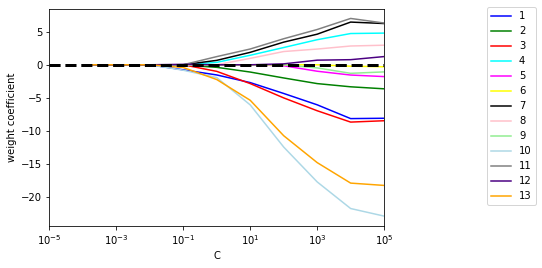

In [8]:
#测算正则化路径，即不同特征在不同正则化强度下的权重系数
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1',C=10.**c, solver='liblinear', random_state=0)
    lr.fit(X_train_std, Y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38,1.03), ncol=1, fancybox=True)
plt.show()

1) 13                             0.185453
 2) 7                              0.174751
 3) 10                             0.143920
 4) 12                             0.136162
 5) 1                              0.118529
 6) 11                             0.058739
 7) 6                              0.050872
 8) 5                              0.031357
 9) 2                              0.025648
10) 9                              0.025570
11) 4                              0.022366
12) 8                              0.013354
13) 3                              0.013279


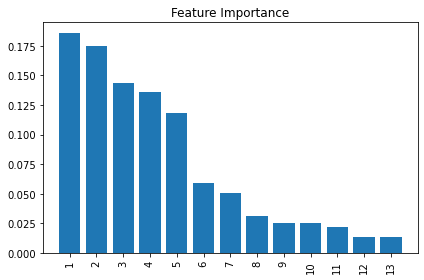

In [8]:
#用随机森林来进行特征选择算法降维,基于树的模型无需使用标准或归一化特征
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, Y_train)
importances = forest.feature_importances_
#返回数组值从小到大的索引值
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [9]:
print(X)
print(Y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
